# Good Books Readings

The aim is to build a recommendation system for good books readings. 
The user is asked to enter the title of a book he wants to read or has already read and the system will propose him some book readings.
First step would be to understand the dataset provided in Kaggle.
Unfortunatelly kaggle dataset gives no information about the kind of book; building clusters using the books genre for a recommendation system is not possible.
Goodreads API wil be used to get the popular shelves.

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from yellowbrick.cluster import InterclusterDistance

In [429]:
books=pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


# Step 1. Check and understand the data

In [611]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [581]:
books.shape

(13714, 10)

In [187]:
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [190]:
books.duplicated().value_counts()

False    13714
dtype: int64

In [191]:
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
# num_pages             int64
ratings_count           int64
text_reviews_count      int64
dtype: object

In [17]:
print('The total number of titles is :', len(books.title.value_counts()))

The total number of titles is : 12422


In [18]:
print('The total number of authors is :', len(books.authors.value_counts()))

The total number of authors is : 7600


In [19]:
print('The total number of books is :', len(books.isbn.value_counts()))

The total number of books is : 13714


In [22]:
books.language_code.value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
rus          7
nl           7
swe          6
glg          4
tur          3
cat          3
lat          3
enm          3
ara          2
nor          1
srp          1
wel          1
msa          1
gla          1
ale          1
dan          1
heb          1
Name: language_code, dtype: int64

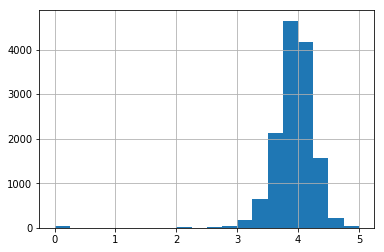

In [24]:
books.average_rating.hist(bins=20)

The majority of books are rated between 3.6 and 4.2. 
Books rated more than 5 are extremely rare.

In [43]:
print(f'Top 15 Authors are: \n{books.authors.value_counts()[:15]}')

Top 15 Authors are: 
Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Gabriel García Márquez         31
Sandra Brown                   31
J.R.R. Tolkien                 31
Michael Crichton               30
Mercedes Lackey                30
Anne Rice                      29
Name: authors, dtype: int64


In [46]:
books[books['authors']=='J.K. Rowling-Mary GrandPré']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
5300,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,0439064864,9780439064866,eng,341,2115562,32694
10540,34318,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0786222727,9780786222728,eng,424,132,12
13634,47523,Harry Potter Boxed Set (Harry Potter #1-4),J.K. Rowling-Mary GrandPré,4.67,0439434866,9780439434867,eng,1820,534,6


In [47]:
books[books['authors']=='J.K. Rowling']

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
693,2002,Harry Potter Schoolbooks Box Set: Two Classic ...,J.K. Rowling,4.40,043932162X,9780439321624,eng,240,11459,143
695,2005,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0747584664,9780747584667,eng,768,1173,72
1123,3357,Harry Potter Y La Piedra Filosofal (Harry Pott...,J.K. Rowling,4.47,0613359607,9780613359603,spa,254,84,5
1429,4256,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,074757362X,9780747573623,eng,480,3116,147
5295,15875,Harry Potter y la cámara secreta (Harry Potter...,J.K. Rowling,4.41,8498380138,9788498380132,spa,288,181,15
5296,15876,Harry Potter y la Orden del Fénix (Harry Potte...,J.K. Rowling,4.49,8478888845,9788478888849,spa,893,4893,397
10519,34258,Harry Potter y la Orden del Fénix (Harry Potte...,J.K. Rowling,4.49,8478887423,9788478887422,spa,896,953,51
12253,41907,Harry Potter und die Kammer des Schreckens (Ha...,J.K. Rowling,4.41,3551552096,9783551552099,ger,351,25,1


In [73]:
books.authors=np.where(books['authors']=='J.K. Rowling-Mary GrandPré', 'J.K. Rowling', books['authors'])

In [182]:
high_rated_authors= books[books['average_rating']>=4.2]

In [183]:
high_rated_authors=high_rated_authors.groupby('authors')['title'].count().sort_values(ascending=False).reset_index()[:15]

In [184]:
high_rated_authors.set_index('authors')

,title
authors,
J.R.R. Tolkien,28
Rumiko Takahashi,28
J.K. Rowling,23
Stephen King,20
P.G. Wodehouse,18
Bill Watterson,16
Tite Kubo,14
Terry Pratchett,12
Hiromu Arakawa-Akira Watanabe,12


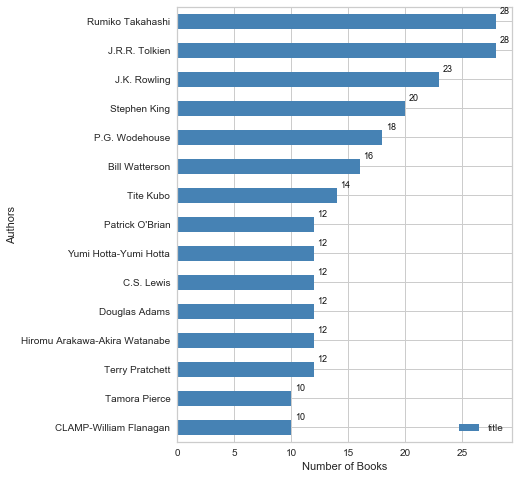

In [903]:
ax=high_rated_authors.set_index('authors').sort_values(by='title').plot.barh(figsize=(6,8),color='steelblue')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 9, color = 'k')

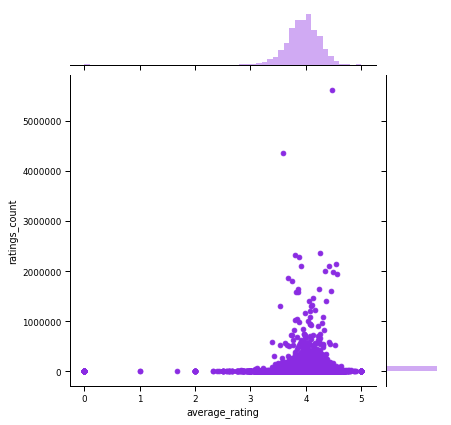

In [162]:
sns.jointplot('average_rating', 'ratings_count', data=books, color = 'blueviolet')

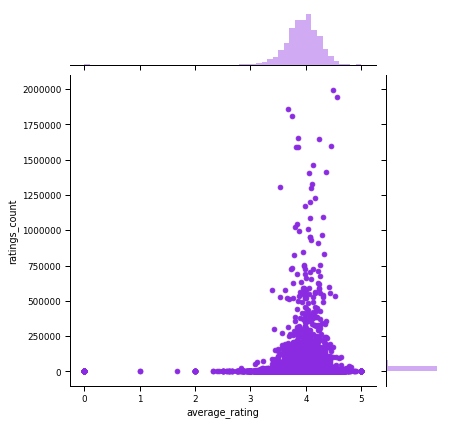

In [164]:
sns.jointplot('average_rating', 'ratings_count', data=books[~(books.ratings_count>2000000)], color = 'blueviolet')

From the relationship below between books average ratings and ratings count we can observe that:
As the number of ratings increase the book ratings seems to move toward 4.

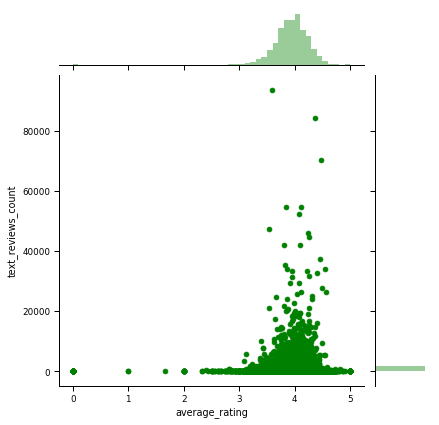

In [165]:
sns.jointplot('average_rating', 'text_reviews_count', data=books, color = 'green')

let's delete the outliers

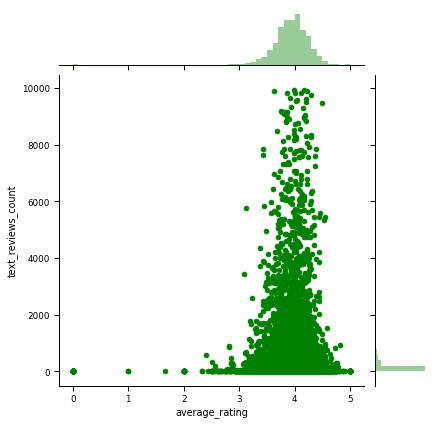

In [167]:
sns.jointplot('average_rating', 'text_reviews_count', data=books[~(books.text_reviews_count>10000)], color = 'green')

Most of reviews lies under 2.000 and are predominant for good ratings.

# Step 2. Get the popular shelves from Goodreads API

In [192]:
!pip install GoodReads

  Stored in directory: C:\Users\anast\AppData\Local\pip\Cache\wheels\70\10\60\95c53185e3b96fa8da290cefe495d5eef298734b7d7f634e72
  Stored in directory: C:\Users\anast\AppData\Local\pip\Cache\wheels\7b\94\5d\81afc278dd5da884a0002563dc4b0fe85f9067a5a40f76f858
Successfully built GoodReads rauth


In [195]:
from goodreads import client

In [196]:
#key: cRd6ZombkDuqFxQ0MLTFA
#secret: cdonTwSo1b8OpMcAITYq23aUkud619k1SubgLkC0g

In [197]:
gc = client.GoodreadsClient("cRd6ZombkDuqFxQ0MLTFA", "cdonTwSo1b8OpMcAITYq23aUkud619k1SubgLkC0g")

In [198]:
book = gc.book(isbn="0439785960")
book.popular_shelves

[to-read,
 fantasy,
 favorites,
 currently-reading,
 young-adult,
 fiction,
 harry-potter,
 books-i-own,
 owned,
 ya,
 series,
 favourites,
 magic,
 childrens,
 owned-books,
 re-read,
 adventure,
 children,
 j-k-rowling,
 audiobook,
 childhood,
 audiobooks,
 children-s,
 sci-fi-fantasy,
 my-books,
 all-time-favorites,
 classics,
 default,
 middle-grade,
 reread,
 5-stars,
 i-own,
 novels,
 children-s-books,
 favorite-books,
 my-library,
 favorite,
 kids,
 fantasy-sci-fi,
 ya-fantasy,
 paranormal,
 read-more-than-once,
 english,
 urban-fantasy,
 audio,
 teen,
 books,
 library,
 british,
 re-reads,
 witches,
 jk-rowling,
 mystery,
 ya-fiction,
 novel,
 read-in-2016,
 my-favorites,
 read-in-2017,
 own-it,
 supernatural,
 childrens-books,
 harry-potter-series,
 faves,
 read-in-2018,
 kindle,
 2005,
 young-adult-fiction,
 scifi-fantasy,
 bookshelf,
 my-bookshelf,
 favorite-series,
 rereads,
 wizards,
 made-me-cry,
 on-my-shelf,
 all-time-favourites,
 5-star,
 favourite,
 youth,
 juvenile,
 

In [200]:
??pd.DataFrame.iterrows

In [204]:
shelves = []
i = 0
for row in books.iterrows():
    index = row[0]
    features = row[1]
    book = gc.book(isbn=features["isbn"])
    shelves.append(book.popular_shelves)
    i += 1
    if i % 100 == 0:
        print(i)

1000
2000
3000
4000
5000
6000


TypeError: __str__ returned non-string (type tuple)

In [238]:
isbn2shelves={}
i=0
import time
import timeit
for row in books.iterrows():
    index = row[0]
    features = row[1]
    if features["isbn"] in isbn2shelves:
        continue
    try:
        book = gc.book(isbn=features["isbn"])
        isbn2shelves[features["isbn"]] = book.popular_shelves
    except:
        print("isbn didnt work", features["isbn"])
    i += 1
    if i % 100 == 0:
        print(i)
    if i%50==0:
        time.sleep(5)

isbn didnt work 0439470145
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
isbn didnt work 0393958043
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
isbn didnt work 1402732988
6600
6700
6800
6900
7000
7100
7200


In [248]:
isbn2shelves['0393958043']=book.popular_shelves

In [251]:
#book = gc.book(isbn="0439470145")
#book.popular_shelves
#this book is not in the goodreads api 

In [249]:
len(isbn2shelves)

13712

In [252]:
#book = gc.book(isbn="1402732988")
#book.popular_shelves
#this book is not present in a popular_shelve

In [322]:
data_dict=pd.DataFrame([isbn2shelves.keys(), isbn2shelves.values()]).T

In [367]:
data_dict.shape

(13711, 2)

In [412]:
data_dict

,0,1
0,0439785960,"[to-read, fantasy, favorites, currently-readin..."
1,0439358078,"[to-read, fantasy, currently-reading, favorite..."
2,0439554934,"[to-read, currently-reading, fantasy, favorite..."
3,0439554896,"[to-read, fantasy, currently-reading, favorite..."
4,043965548X,"[to-read, fantasy, favorites, currently-readin..."
5,0439682584,"[to-read, favorites, fantasy, currently-readin..."
6,0976540606,"[to-read, harry-potter, lla_wanted, lle_wanted..."
7,0439827604,"[to-read, favorites, fantasy, currently-readin..."
8,0517226952,"[to-read, currently-reading, favorites, scienc..."
9,0345453743,"[to-read, currently-reading, favorites, scienc..."


In [422]:
data_dict.rename(columns={0: "isbn", 1: "popular_shelves"}, inplace=True)

In [425]:
f = open("shelves_save.csv", "w", encoding="utf-8")
i = 0
isbn_wo_shelves = []
for row in data_dict.iterrows():
    isbn = row[1]["isbn"]
    try:
        pop_shelves = row[1]["popular_shelves"]
        # we cast the shelves into string
        f.write(isbn + "," + ",".join([str(s) for s in pop_shelves]) + "\n")
    except:
        # somehow it doesn't work for every shelf so we save the ones that don't work to remove them
        print("shelves dont work isbn : ", isbn)
        isbn_wo_shelves.append(isbn)
    i += 1
    if i % 1000 == 0:
        print(i)
f.close()

1000
2000
3000
4000
5000
6000
shelves dont work isbn :  0744005612
shelves dont work isbn :  0439271711
shelves dont work isbn :  189044717X
shelves dont work isbn :  037306232X
shelves dont work isbn :  1903582415
shelves dont work isbn :  0738511676
shelves dont work isbn :  1932206086
shelves dont work isbn :  3804417353
shelves dont work isbn :  8644101277
shelves dont work isbn :  1583377824
shelves dont work isbn :  155994093X
shelves dont work isbn :  0333581296
shelves dont work isbn :  0893562505
shelves dont work isbn :  0415940478
shelves dont work isbn :  0851621813
shelves dont work isbn :  0916724948
shelves dont work isbn :  076032963X
shelves dont work isbn :  0811832791
7000
shelves dont work isbn :  8473110102
shelves dont work isbn :  0198284543
shelves dont work isbn :  1564741575
shelves dont work isbn :  0738519383
8000
shelves dont work isbn :  0862431352
shelves dont work isbn :  0744003229
shelves dont work isbn :  0394755669
shelves dont work isbn :  844068541

In [426]:
len(isbn_wo_shelves)

47

In [531]:
shelves_df = data_dict

In [532]:
shelves_df = shelves_df[~shelves_df.isbn.isin(isbn_wo_shelves)]

In [475]:
flattened_shelves_df = pd.Series([shelf for pop_shelves in shelves_df["popular_shelves"] for shelf in pop_shelves])

In [485]:
flattened_shelves_df.head()

0        to-read
1        fantasy
2      favorites
4    young-adult
5        fiction
dtype: object

In [477]:
flattened_shelves_df = flattened_shelves_df.apply(str)

# Step 3. Select the most frequent shelves 

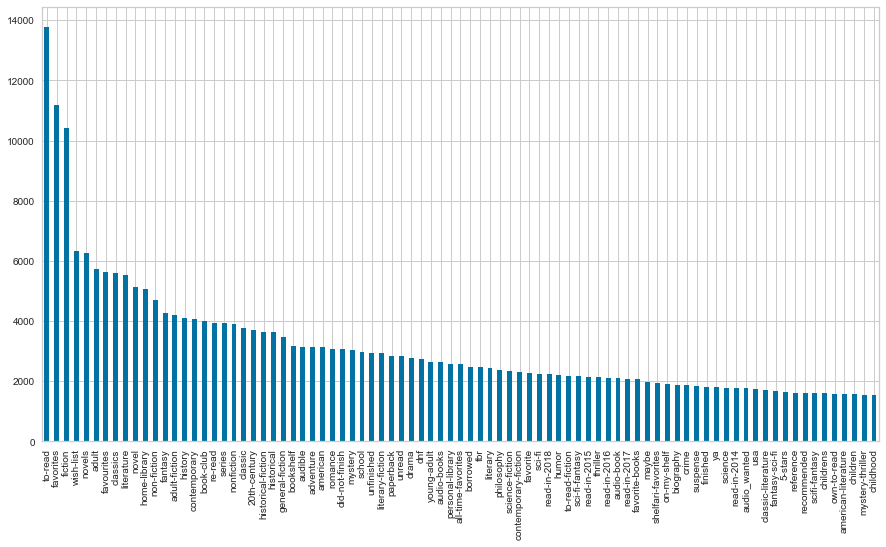

In [904]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
flattened_shelves_df.value_counts().head(85).plot(kind='bar')

In [479]:
genreExceptions = ['own-it', 'e-book', 'have', 'abandoned', 'i-own', 'currently-reading', 'owned', 'default', 'books-i-own','ebook', 'kindle', 'library', 'audiobook', 'owned-books', 'audiobooks', 'my-books', 'ebooks', 'to-buy', 'english', 'calibre', 'books', 'british', 'audio', 'my-library', 'general', 'e-books']

In [480]:
flattened_shelves_df = flattened_shelves_df[~flattened_shelves_df.isin(genreExceptions)]

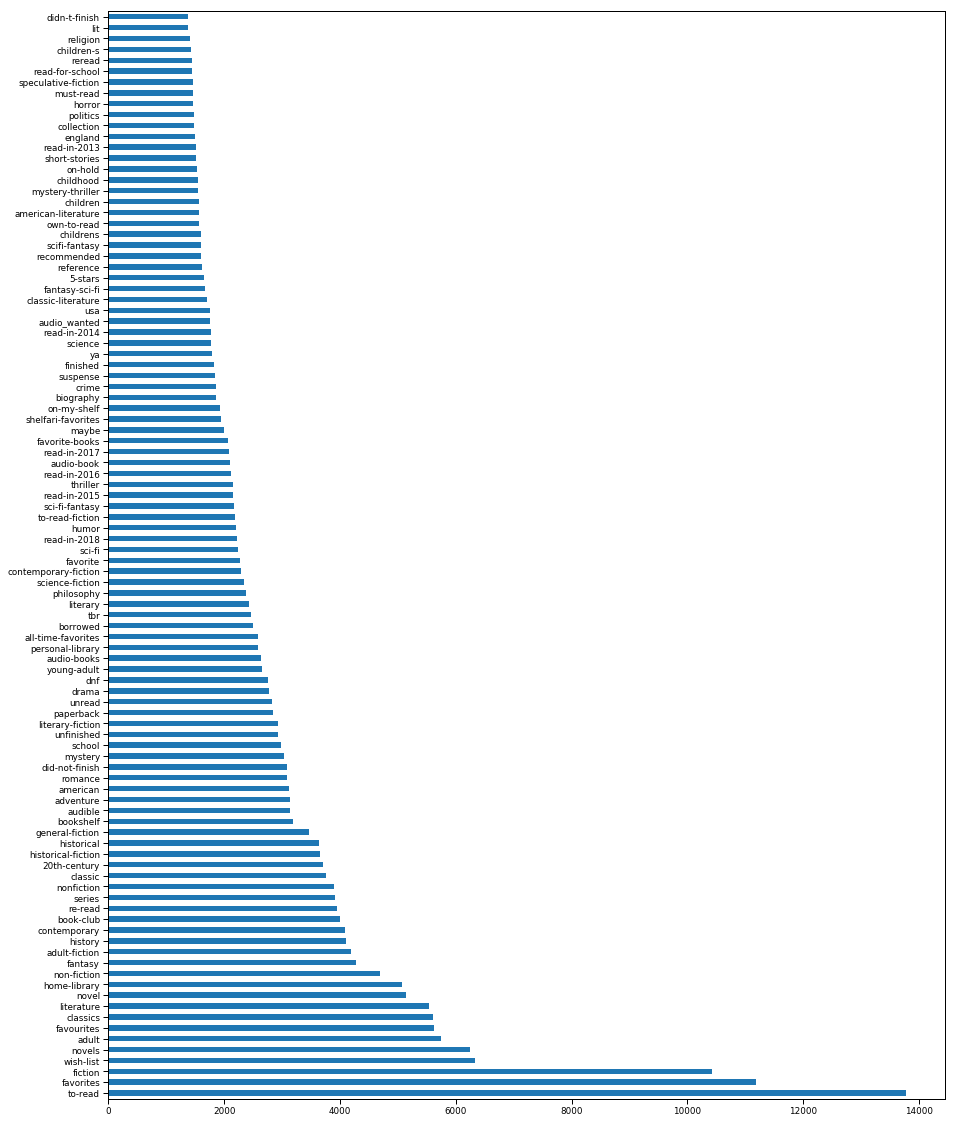

In [481]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,20))
flattened_shelves_df.value_counts().head(100).plot(kind='barh')

In [520]:
shelves_to_keep = flattened_shelves_df.value_counts().head(100)

In [521]:
shelves_to_keep

to-read                13767
favorites              11186
fiction                10420
wish-list               6336
novels                  6253
adult                   5742
favourites              5629
classics                5608
literature              5532
novel                   5145
home-library            5078
non-fiction             4685
fantasy                 4268
adult-fiction           4196
history                 4108
contemporary            4080
book-club               4002
re-read                 3950
series                  3921
nonfiction              3901
classic                 3761
20th-century            3702
historical-fiction      3650
historical              3644
general-fiction         3468
bookshelf               3186
audible                 3143
adventure               3137
american                3125
romance                 3088
                       ...  
read-in-2014            1774
audio_wanted            1762
usa                     1747
classic-litera

# Step 4. Get isbn for selected shelves and apply dummies

In [555]:
filtered_shelves_df = []
for row in shelves_df.iterrows():
    idx = row[0]
    isbn = row[1]["isbn"]
    pop_shelves = row[1]["popular_shelves"]
    filtered_pop_shelves = [str(shelf) for shelf in pop_shelves if str(shelf) in shelves_to_keep.index]
    if len(filtered_pop_shelves) == 0:
        print(pop_shelves)
        continue
    filtered_shelves_df.append({"isbn": isbn, "popular_shelves": filtered_pop_shelves})
filtered_shelves_df = pd.DataFrame(filtered_shelves_df)

[academic, jhu]


In [563]:
filtered_shelves_df.drop("popular_shelves", axis=1)

,isbn
0,0439785960
1,0439358078
2,0439554934
3,0439554896
4,043965548X
5,0439682584
6,0976540606
7,0439827604
8,0517226952
9,0345453743


In [565]:
dummified_isbn_to_shelves_df = pd.concat([filtered_shelves_df.drop("popular_shelves", axis=1), \
           pd.get_dummies(filtered_shelves_df["popular_shelves"].apply(pd.Series).stack()).sum(level=0)], axis=1)

In [572]:
dummified_isbn_to_shelves_df

,isbn,20th-century,5-stars,adult,adult-fiction,adventure,all-time-favorites,american,american-literature,audible,...,tbr,thriller,to-read,to-read-fiction,unfinished,unread,usa,wish-list,ya,young-adult
0,0439785960,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0439358078,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,0439554934,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,0439554896,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
4,043965548X,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
5,0439682584,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
6,0976540606,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0439827604,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
8,0517226952,1,1,1,1,1,1,0,0,0,...,1,0,1,0,1,1,0,1,0,1
9,0345453743,1,1,1,1,1,1,0,0,0,...,1,0,1,0,1,1,0,1,0,1


# Step 5. Create dataset for clustering

In [598]:
?pd.merge

In [606]:
merged_df=pd.merge(books,dummified_isbn_to_shelves_df, how='inner', left_on='isbn', right_on='isbn' ).drop('title_y', axis=1)

In [619]:
merged_df.dtypes

bookID                   int64
title_x                 object
authors                 object
average_rating         float64
isbn                    object
isbn13                   int64
language_code           object
# num_pages              int64
ratings_count            int64
text_reviews_count       int64
20th-century             uint8
5-stars                  uint8
adult                    uint8
adult-fiction            uint8
adventure                uint8
all-time-favorites       uint8
american                 uint8
american-literature      uint8
audible                  uint8
audio-book               uint8
audio-books              uint8
audio_wanted             uint8
biography                uint8
book-club                uint8
bookshelf                uint8
borrowed                 uint8
childhood                uint8
children                 uint8
children-s               uint8
childrens                uint8
                        ...   
read-in-2015             uint8
read-in-

In [621]:
merged_df.head()

,bookID,title_x,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,...,tbr,thriller,to-read,to-read-fiction,unfinished,unread,usa,wish-list,ya,young-adult
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0439785960,9780439785969,eng,652,1944099,26249,...,0,0,1,0,0,0,0,0,1,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,1996446,27613,...,0,0,1,0,0,0,0,0,1,1
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320,5629932,70390,...,0,0,1,0,0,0,0,0,1,1
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272,...,0,0,1,0,0,0,0,0,1,1
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9780439655484,eng,435,2149872,33964,...,0,0,1,0,0,0,0,0,1,1


In [609]:
merged_df.authors=np.where(merged_df['authors']=='J.K. Rowling-Mary GrandPré', 'J.K. Rowling', merged_df['authors'])

In [612]:
merged_df.to_csv('books_for_model.csv')

In [3]:
import pandas as pd 
merged_df=pd.read_csv('books_for_model.csv')

# Step 6. Cluster the books 

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split

In [5]:
merged_df.head()

,Unnamed: 0,bookID,title_x,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,...,tbr,thriller,to-read,to-read-fiction,unfinished,unread,usa,wish-list,ya,young-adult
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0439785960,9780439785969,eng,652,1944099,...,0,0,1,0,0,0,0,0,1,1
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,1996446,...,0,0,1,0,0,0,0,0,1,1
2,2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320,5629932,...,0,0,1,0,0,0,0,0,1,1
3,3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,...,0,0,1,0,0,0,0,0,1,1
4,4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9780439655484,eng,435,2149872,...,0,0,1,0,0,0,0,0,1,1


Prepare data, normalize 

In [6]:
df_cluster=merged_df.drop(['Unnamed: 0','authors','isbn','isbn13','language_code','bookID'],axis=1)

In [7]:
df_cluster=df_cluster.set_index(['title_x'])

In [8]:
df_new=df_cluster.drop(df_cluster[df_cluster['# num_pages']==0].index)

In [9]:
df_new=df_new.drop(df_new[df_new['ratings_count']==0].index)

In [22]:
import numpy as np

In [11]:
df_new['# num_pages']=df_new['# num_pages'].apply(np.log)
df_new['ratings_count']=df_new['ratings_count'].apply(np.log)
df_new['average_rating']=df_new['average_rating'].apply(np.log)

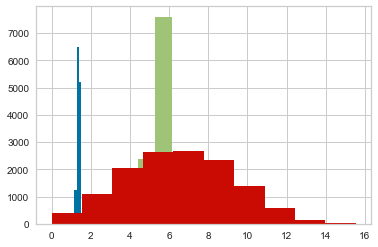

In [12]:
df_new['average_rating'].hist()
df_new['# num_pages'].hist()
df_new['ratings_count'].hist()

In [13]:
df_new.text_reviews_count[df_new.text_reviews_count==0]=df_new.text_reviews_count.median()

C:\Users\anast\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_new.text_reviews_count=df_new.text_reviews_count.apply(np.log)

In [15]:
df_new.columns

Index(['average_rating', '# num_pages', 'ratings_count', 'text_reviews_count',
       '20th-century', '5-stars', 'adult', 'adult-fiction', 'adventure',
       'all-time-favorites',
       ...
       'tbr', 'thriller', 'to-read', 'to-read-fiction', 'unfinished', 'unread',
       'usa', 'wish-list', 'ya', 'young-adult'],
      dtype='object', length=104)

Apply PCA - KMeans clustering

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(24)

In [27]:
pca.fit(df_new)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.explained_variance_ratio_.sum()
# 24 components explain 80% of the data

0.8030989209258962

In [915]:
df_new.shape

(13431, 106)

In [29]:
df_pca=pca.fit_transform(df_new)

In [32]:
df_pca=pd.DataFrame(data=df_pca)

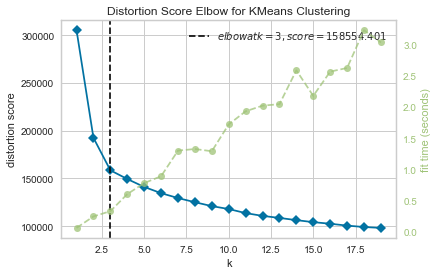

In [789]:
model=KMeans()
viz=KElbowVisualizer(model, k=(1,20))
viz.fit(df_pca)
viz.poof()

In [33]:
model=KMeans(3)
model.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
df_new['cluster_pca_km']=model.fit_predict(df_pca)

In [35]:
df_new['cluster_pca_km'].value_counts()

1    5404
2    4710
0    3317
Name: cluster_pca_km, dtype: int64

Cluster 0 contains 3317 books, cluster 1 contains 5404 books, cluster 2 contains 4710 books

In [36]:
df_pca['km_labels']=model.fit_predict(df_pca)

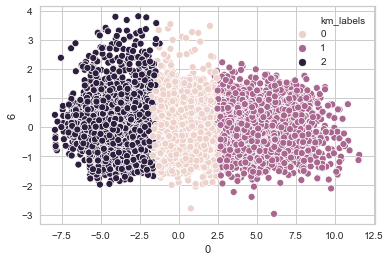

In [37]:
import seaborn as sns
sns.scatterplot(x=0,y=6,data=df_pca, hue='km_labels')

In [38]:
df_new.groupby('cluster_pca_km').ratings_count.mean()

cluster_pca_km
0    10.021363
1     6.928508
2     3.591316
Name: ratings_count, dtype: float64

In [39]:
df_new.groupby('cluster_pca_km').average_rating.mean()

cluster_pca_km
0    1.373442
1    1.371793
2    1.361913
Name: average_rating, dtype: float64

In [40]:
df_new.groupby('cluster_pca_km').text_reviews_count.mean()

cluster_pca_km
0    6.777097
1    4.097779
2    1.888633
Name: text_reviews_count, dtype: float64

In [41]:
df_new=df_new.reset_index()

In [42]:
df_new.groupby('cluster_pca_km')['title_x'].count()

cluster_pca_km
0    3317
1    5404
2    4710
Name: title_x, dtype: int64

In [43]:
round(((df_new.loc[df_new['cluster_pca_km']==0,'20th-century':].sum())/df_new.shape[0]*100),2).sort_values(ascending=False).head(25)

to-read               24.96
favorites             24.68
fiction               23.28
novels                18.35
adult                 18.20
favourites            16.65
wish-list             16.48
novel                 14.96
adult-fiction         14.17
home-library          13.27
book-club             13.12
contemporary          12.98
literature            12.50
classics              12.31
re-read               12.11
general-fiction       10.93
audible               10.89
fantasy               10.17
series                10.12
audio-books            9.70
did-not-finish         9.60
20th-century           9.32
american               8.93
historical-fiction     8.87
dnf                    8.70
dtype: float64

In [45]:
round(((df_new.loc[df_new['cluster_pca_km']==1,'20th-century':].sum())/df_new.shape[0]*100),2).sort_values(ascending=False).head(25)

to-read               40.53
cluster_pca_km        40.24
favorites             36.62
fiction               32.19
wish-list             19.43
literature            17.41
novels                17.30
classics              17.24
non-fiction           15.38
favourites            14.90
adult                 14.74
home-library          14.46
novel                 14.07
history               13.71
nonfiction            13.59
fantasy               12.49
classic               11.72
series                11.59
historical            11.56
20th-century          11.29
historical-fiction    11.02
contemporary          10.60
book-club             10.10
adult-fiction          9.94
re-read                9.74
dtype: float64

In [44]:
round(((df_new.loc[df_new['cluster_pca_km']==2,'20th-century':].sum())/df_new.shape[0]*100),2).sort_values(ascending=False).head(25)

cluster_pca_km        70.14
to-read               35.28
fiction               20.96
favorites             20.92
non-fiction           13.15
classics              11.54
wish-list             10.72
literature            10.70
nonfiction            10.19
novels                10.13
favourites             9.81
history                9.52
home-library           9.42
adult                  9.11
novel                  8.60
fantasy                8.52
classic                7.37
series                 7.15
re-read                7.06
historical             6.91
historical-fiction     6.78
20th-century           6.66
adult-fiction          6.46
contemporary           6.38
school                 6.34
dtype: float64

Clustering insights:
    
The books with highest number of ratings and reviews are located in the cluster 0. but cluster 0 contains the lowest number of books 
In cluster 2 we can find some school books.
In cluster 1 we can find more books from classic authors than in the other clusters. 
For better clustering insights we might need to redefine the shelves.


# Step 7. Build the recommendation system

In [46]:
df_new

,title_x,average_rating,# num_pages,ratings_count,text_reviews_count,20th-century,5-stars,adult,adult-fiction,adventure,...,thriller,to-read,to-read-fiction,unfinished,unread,usa,wish-list,ya,young-adult,cluster_pca_km
0,Harry Potter and the Half-Blood Prince (Harry ...,1.517323,6.480045,14.480309,10.175383,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,Harry Potter and the Order of the Phoenix (Har...,1.501853,6.768493,14.506879,10.226042,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
2,Harry Potter and the Sorcerer's Stone (Harry P...,1.497388,5.768321,15.543608,11.161806,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
3,Harry Potter and the Chamber of Secrets (Harry...,1.483875,5.863631,8.743053,5.605802,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,Harry Potter and the Prisoner of Azkaban (Harr...,1.515127,6.075346,14.580919,10.433056,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,1.564441,7.897296,10.568029,5.036953,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
6,"Unauthorized Harry Potter Book Seven News: ""Ha...",1.305626,5.023881,2.890372,0.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
7,Harry Potter Collection (Harry Potter #1-6),1.553925,8.114325,10.218663,6.709304,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
8,The Ultimate Hitchhiker's Guide: Five Complete...,1.477049,6.703188,8.189245,5.552960,1,1,1,1,1,...,0,1,0,1,1,0,1,0,1,0
9,The Ultimate Hitchhiker's Guide to the Galaxy,1.477049,6.703188,12.389181,8.282483,1,1,1,1,1,...,0,1,0,1,1,0,1,0,1,0


In [57]:
user_input= input('enter the book title: ')
g=user_input

enter the book title: the lost continent


In [55]:
from sklearn.metrics.pairwise import cosine_similarity
cos_mat = cosine_similarity(df_new.drop(["title_x"], axis=1))
results = cos_mat[np.where(df_new.title_x.str.lower().str.contains(g.lower()))[0][0]]
sorted_books = results.argsort()[::-1][1:10]
sorted_results = results[sorted_books]
i = 0
book_list=[]
for book in df_new.iloc[sorted_books].index:
    book_list.append(book)
    print(df_new.iloc[book]["title_x"])
    i += 1

Notes from a Small Island
I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away
Neither Here nor There: Travels in Europe
Julie and Julia: 365 Days  524 Recipes  1 Tiny Apartment Kitchen
In a Sunburned Country
A Walk in the Woods: Rediscovering America on the Appalachian Trail
Candy Girl: A Year in the Life of an Unlikely Stripper
The Know-It-All: One Man's Humble Quest to Become the Smartest Person in the World
Made in America: An Informal History of the English Language in the United States
